In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import graphviz

# Function to convert NLTK tree to graphviz source
def to_graphviz(tree):
    dot = graphviz.Digraph(comment='Parse Tree')

    def add_nodes_edges(tree, dot, parent_index=None, index=0):
        node_index = index
        if isinstance(tree, nltk.Tree):
            node_label = tree.label()
            dot.node(str(node_index), node_label)
            if parent_index is not None:
                dot.edge(str(parent_index), str(node_index))
            for child in tree:
                index += 1
                index = add_nodes_edges(child, dot, node_index, index)
        else:
            # Leaf node
            dot.node(str(index), str(tree))
            if parent_index is not None:
                dot.edge(str(parent_index), str(index))
        return index

    add_nodes_edges(tree, dot)
    return dot

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
grammar1 = """NP: {<DT>?<JJ>*<NN.*>+} VP: {<VBG><NP><MD><VB><JJ>}"""

grammar2 = """NP: {<VBG><NN.*>} VP: {<MD><VB><JJ>}"""

sentence="Flying planes can be dangerous"


In [ ]:
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
print(tagged)

[('Flying', 'VBG'), ('planes', 'NNS'), ('can', 'MD'), ('be', 'VB'), ('dangerous', 'JJ')]


In [ ]:
# Create trees
parser1 = nltk.RegexpParser(grammar1)
tree1 = parser1.parse(tagged)
# print(tree1)

parser2 = nltk.RegexpParser(grammar2)
tree2 = parser2.parse(tagged)
# print(tree2)


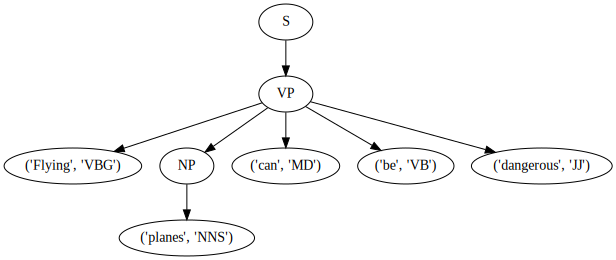

In [ ]:
to_graphviz(tree1)


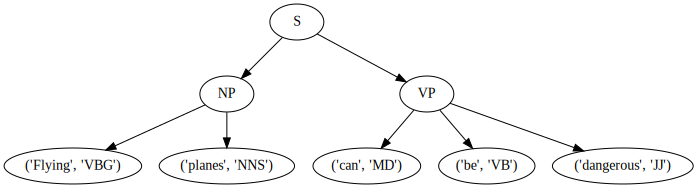

In [ ]:
to_graphviz(tree2)